<a href="https://colab.research.google.com/github/Kozhedu/MOMO_2/blob/main/Kozhewdub_Kaggle2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Подключение к Kaggle для загрузки данных прямо из браузера


 Проходим в [Свой профиль на Kaggle](https://www.kaggle.com/me/account) и жмем "Create API Token".
 
 Это вызовет загрузку файла *kaggle.json*, содержащего ваши учетные данные для API.

Затем запустите ячейку ниже, чтобы загрузить kaggle.json в среду выполнения Colab.

In [ ]:
from google.colab import files # чтобы загружать файлы в облако через проводник 

In [ ]:
uploaded = files.upload() #просто запускаем и выбираем файл  API токена в проводнике

#↓ строка которая активирует наш API токен
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


# Загружаем Данные

Можно загружать "скучно" скачав данные [Со странницы соревнования](https://www.kaggle.com/competitions/urfuaieng2022reg2/data)

Либо через Kaggle api по указанной ссылке 

In [ ]:
#↓ добавился восклицательный знак, потому что это колаб
!kaggle competitions download -c urfuaieng2022clf2

 92% 38.0M/41.4M [00:00<00:00, 97.3MB/s]
100% 41.4M/41.4M [00:00<00:00, 108MB/s] 


Распаковываем архив "на месте" 

In [ ]:
#↓ "распакуй" + имя архива
!unzip urfuaieng2022clf2.zip

Archive:  urfuaieng2022clf2.zip
  inflating: Submission_clf.csv      
  inflating: Test_Who.csv            
  inflating: Train_Target_clf.csv    
  inflating: Train_Who.csv           
  inflating: assessments.csv         
  inflating: courses.csv             
  inflating: studentInfo.csv         
  inflating: studentRegistration.csv  
  inflating: studentVle.csv          
  inflating: vle.csv                 


## Некоторые полезные функции для анализа табличек между собой

In [ ]:
def compareCols(df1, df2):
    '''
    Проверьте, какие столбцы являются общими для двух фреймов данных, 
    и подсчитайте значения df1, присутствующие и отсутствующие в df2 (в общих столбцах).
    '''

    # Показать общие столбцы между фреймами данных
    # (a) Составьте списки столбцов для каждого фрейма данных
    df1Columns = df1.columns.values.tolist()
    df2Columns = df2.columns.values.tolist()

    # (b) Найдите одинаковые имена столбцов
    diffDict = set(df1Columns) & set(df2Columns)
    
    print('Общие колонки : ', diffDict, '\n')

    # (c) Составьте список из словаря
    diffList = list(diffDict)
    # (d) Убедитесь, что если значения в
    # каждый общий столбец совпадает в
    # двух фреймах данных
    for col in diffList:
        x = df1[col].isin(df2[col]).value_counts()
        print('Проверяем, присутствуют ли значения в обоих фреймах данных:')
        print(x, '\n')



In [ ]:
def findDiffValues(df1, df2, col):
    '''
    Найти все значения df1.col, отсутствующие в df2.col
    '''
    # Вытащите все уникальные значения col
    df1_IDs = df1[col].unique()
    df2_IDs = df2[col].unique()

    # Сравните два списка
    # (a) Найдите, какие значения отличаются
    diff = set(df1_IDs).difference(set(df2_IDs))
    # (b) осчитайте, сколько разных
    numberDiff = len(diff)

    print("Значения из df1 не в df2: " + str(diff))
    print("Количество пропущенных значений: " + str(numberDiff))

In [ ]:
def printDiffValues(df1, df2, col):
    '''
    Показать все значения df1.col, отсутствующие в df2.col
    '''
    # Вытащить все уникальные значения col
    df1_IDs = df1[col].unique()
    df2_IDs = df2[col].unique()

    # Сравните два списка
    # (a) Найдите, какие значения отличаются
    diff = set(df1_IDs).difference(set(df2_IDs))
    
    # Показать информацию обо всех значениях df1.col, отсутствующих в df2.col
    # (a) Составьте список недостающих значений
    missingList = list(diff)
    # (b) Найдите эти идентификаторы в df2
    missingDf = df1[df1[col].isin(missingList)]

    return missingDf

# Загружаем данные в Pandas

In [ ]:
import pandas as pd # Библиотека Pandas для работы с табличными данными

In [ ]:
# данные которые "все"
ass = pd.read_csv('/content/assessments.csv')
courses = pd.read_csv('/content/courses.csv')
results = pd.read_csv('/content/studentRegistration.csv')
info = pd.read_csv('/content/studentInfo.csv')
reg = pd.read_csv('/content/studentRegistration.csv')
vle = pd.read_csv('/content/studentVle.csv')
materials = pd.read_csv('/content/vle.csv')

## Assessments info (информация об оценках)

1. **code_module** – идентификационный код модуля, которому принадлежит оценка.
2. **code_presentation** - идентификационный код презентации, к которой относится оценка.
3. **id_assessment** – идентификационный номер оценки.
4. **assessment_type** – вид оценки. Существует три типа оценок: оцениваемая репетитором (TMA), компьютерная оцениваемая оценка (CMA) и итоговый экзамен (Exam).
5. **date** – информация об окончательной дате сдачи оценки, рассчитанная как количество дней с момента начала модуля-презентации. Дата начала презентации имеет номер 0 (ноль).
6. **weight** - вес оценки в %. Обычно Экзамены обрабатываются отдельно и имеют вес 100%; сумма всех остальных оценок равна 100%.

In [ ]:
ass.info() # информация о данных в датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB


Чтобы потом не путаться спрячем id-шники в тип данных "объект" 

In [ ]:
ass['id_assessment'] = ass['id_assessment'].astype(object)

In [ ]:
ass.head() # Метод .head() - первые 5 строк

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


## Assessments results (результаты оценки) 

1. **id_assessment** – идентификационный номер оценки.
2. **id_student** –уникальный идентификационный номер студента.
3. **date_submitted** – дата представления студентом, измеряемая как количество дней с начала презентации модуля.
4. **is_banked** – флаг состояния, указывающий, что результат оценки был перенесен из предыдущей презентации.

In [ ]:
results.info() # информация о данных в датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        32593 non-null  object 
 1   code_presentation  32593 non-null  object 
 2   id_student         32593 non-null  int64  
 3   date_registration  32548 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1018.7+ KB


In [ ]:
results['id_student'] = results['id_student'].astype(object)

In [ ]:
results.head()  # Метод .head() - первые 5 строк

,code_module,code_presentation,id_student,date_registration
0,AAA,2013J,11391,-159.0
1,AAA,2013J,28400,-53.0
2,AAA,2013J,30268,-92.0
3,AAA,2013J,31604,-52.0
4,AAA,2013J,32885,-176.0


## Courses info (информация о курсах)

1. **code_module** – кодовое имя модуля, которое служит идентификатором.
2. **code_presentation** – кодовое название презентации. Он состоит из года и «B» для презентации, начинающейся в феврале, и «J» для презентации, начинающейся в октябре.
3. **module_presentation_length** - длина модуля-презентации в днях.

In [ ]:
courses.info() # информация о данных в датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 656.0+ bytes


In [ ]:
courses.head() # Метод .head() - первые 5 строк

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


## Student registration (регистрация студентов)

1. **code_module** – идентификационный код модуля.
2. **code_presentation** - идентификационный код презентации.
3. **id_student** – уникальный идентификационный номер студента.
4. **date_registration** – дата регистрации студента на презентацию модуля, это количество дней, измеренное относительно начала презентации модуля (например, отрицательное значение -30 означает, что студент зарегистрировался на презентацию модуля за 30 дней до ее начала).

In [ ]:
reg.info() # информация о данных в датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        32593 non-null  object 
 1   code_presentation  32593 non-null  object 
 2   id_student         32593 non-null  int64  
 3   date_registration  32548 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1018.7+ KB


Чтобы потом не путаться спрячем id-шники в тип данных "объект" 

In [ ]:
reg['id_student'] = reg['id_student'].astype(object)

In [ ]:
reg.head() # Метод .head() - первые 5 строк

,code_module,code_presentation,id_student,date_registration
0,AAA,2013J,11391,-159.0
1,AAA,2013J,28400,-53.0
2,AAA,2013J,30268,-92.0
3,AAA,2013J,31604,-52.0
4,AAA,2013J,32885,-176.0


## VLE resources

1. **id_site** - идентификационный номер материала.
2. **code_module** – идентификационный код модуля.
3. **code_presentation** - идентификационный код презентации.
4. **activity_type** – роль, связанная с материалом модуля.
5. **week_from** – неделя, с которой планируется использовать материал.
6. **week_to** – неделя, до которой планируется использовать материал.

In [ ]:
materials.info() # информация о данных в датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_site            6364 non-null   int64  
 1   code_module        6364 non-null   object 
 2   code_presentation  6364 non-null   object 
 3   activity_type      6364 non-null   object 
 4   week_from          1121 non-null   float64
 5   week_to            1121 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 298.4+ KB


Чтобы потом не путаться спрячем id-шники в тип данных "объект" 

In [ ]:
materials['id_site'] = materials['id_site'].astype(object)

In [ ]:
materials.head() # Метод .head() - первые 5 строк

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


## VLE Interactions

1. **code_module** – идентификационный код модуля.
2. **code_presentation** - идентификационный код представления модуля.
3. **id_student** – уникальный идентификационный номер студента.
4. **id_site** - идентификационный номер материала VLE.
5. **date** – дата взаимодействия студента с материалом измеряется как количество дней с начала модуля-презентации.
6. **sum_click** – сколько раз учащийся взаимодействовал с материалом в этот день.

In [ ]:
vle.info() # информация о данных в датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655280 entries, 0 to 10655279
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   code_module        object
 1   code_presentation  object
 2   id_student         int64 
 3   id_site            int64 
 4   date               int64 
 5   sum_click          int64 
dtypes: int64(4), object(2)
memory usage: 487.8+ MB


Чтобы потом не путаться спрячем id-шники в тип данных "объект" 

In [ ]:
vle['id_student'] = vle['id_student'].astype(object)
vle['id_site'] = vle['id_site'].astype(object)

In [ ]:
vle.head() # Метод .head() - первые 5 строк

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


## Student information

1. **code_module** – идентификационный код модуля, на котором зарегистрирован студент.
2. **code_presentation** - идентификационный код презентации, во время которой студент регистрируется на модуле.
3. **id_student** – уникальный идентификационный номер студента.
4. **gender** – пол ученика.
5. **region** – определяет географический регион, в котором студент проживал во время прохождения модуля-презентации.
6. **highest_education** – самый высокий уровень образования студента при поступлении на модульную презентацию.
7. **imd_band** – задает диапазон [Index of Multiple Depravation](https://en.wikipedia.org/wiki/Multiple_deprivation_index#:~:text=Indices%20of%20multiple%20deprivation%20(IMD,a%20single%20score%20of%20deprivation.) места, где студент проживал во время модуля-презентации. (насколько бедный район, короче)
8. **age_band** – диапазон студенческого возраста.
9. **num_of_prev_attempts** – количество раз, когда учащийся пытался пройти этот модуль.
10. **studied_credits** – общее количество кредитов по модулям, которые студент изучает в настоящее время.
11. **disability** – указывает, признан ли студент инвалидом.

In [ ]:
info.info() # информация о данных в датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
dtypes: int64(3), object(8)
memory usage: 2.7+ MB


Чтобы потом не путаться спрячем id-шники в тип данных "объект" 

In [ ]:
info['id_student'] = info['id_student'].astype(object)

In [ ]:
info.head()  # Метод .head() - первые 5 строк

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N


# Как можно объединять данные 

## Регистрация + Информация о курсах

In [ ]:
#                                     ↓ по каким колонкам буддем объединять     ↓ как
regCourses = pd.merge(reg, courses, on=['code_module', 'code_presentation'], how='inner')

regCourses.head()

,code_module,code_presentation,id_student,date_registration,module_presentation_length
0,AAA,2013J,11391,-159.0,268
1,AAA,2013J,28400,-53.0,268
2,AAA,2013J,30268,-92.0,268
3,AAA,2013J,31604,-52.0,268
4,AAA,2013J,32885,-176.0,268


## Регистрация + Информация о курсах + Инфа о студентах

In [ ]:
#                                     ↓ по каким колонкам буддем объединять                       ↓ как
regCoursesInfo = pd.merge(regCourses, info, on=['code_module', 'code_presentation', 'id_student'], how='inner')

regCoursesInfo.head()

,code_module,code_presentation,id_student,date_registration,module_presentation_length,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability
0,AAA,2013J,11391,-159.0,268,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N
1,AAA,2013J,28400,-53.0,268,F,Scotland,HE Qualification,20-30%,35-55,0,60,N
2,AAA,2013J,30268,-92.0,268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y
3,AAA,2013J,31604,-52.0,268,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N
4,AAA,2013J,32885,-176.0,268,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N


In [ ]:
regCoursesInfo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32593 entries, 0 to 32592
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   code_module                 32593 non-null  object 
 1   code_presentation           32593 non-null  object 
 2   id_student                  32593 non-null  object 
 3   date_registration           32548 non-null  float64
 4   module_presentation_length  32593 non-null  int64  
 5   gender                      32593 non-null  object 
 6   region                      32593 non-null  object 
 7   highest_education           32593 non-null  object 
 8   imd_band                    31482 non-null  object 
 9   age_band                    32593 non-null  object 
 10  num_of_prev_attempts        32593 non-null  int64  
 11  studied_credits             32593 non-null  int64  
 12  disability                  32593 non-null  object 
dtypes: float64(1), int64(3), object

In [ ]:
f = vle.groupby(['id_student'])["sum_click"].sum()

In [ ]:
sum = vle.groupby(pd.Grouper(key="id_student")).sum().reset_index()

<ipython-input-34-26e8490b6890>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  sum = vle.groupby(pd.Grouper(key="id_student")).sum().reset_index()
<ipython-input-34-26e8490b6890>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sum = vle.groupby(pd.Grouper(key="id_student")).sum().reset_index()


In [ ]:
sum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26074 entries, 0 to 26073
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   id_student  26074 non-null  int64
 1   date        26074 non-null  int64
 2   sum_click   26074 non-null  int64
dtypes: int64(3)
memory usage: 611.2 KB


In [ ]:
rci = pd.merge(regCoursesInfo, sum, on=['id_student'], how='inner')

rci.head()

,code_module,code_presentation,id_student,date_registration,module_presentation_length,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,date,sum_click
0,AAA,2013J,11391,-159.0,268,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,20018,934
1,AAA,2013J,28400,-53.0,268,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,37407,1435
2,AAA,2013J,30268,-92.0,268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,179,281
3,AAA,2013J,31604,-52.0,268,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,70376,2158
4,AAA,2013J,32885,-176.0,268,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,32361,1034


# Выделение тренировочной и тестовой выборки

Список студентов, соответсвующих модулей и презентаций (разные студенты могут сдавать разные модули)

In [ ]:
Train_Who = pd.read_csv('/content/Train_Who.csv')
Test_Who = pd.read_csv('/content/Test_Who.csv')

In [ ]:
Train_Who

,ID,id_student,code_module,code_presentation
0,0,464685,DDD,2014B
1,1,606593,DDD,2013J
2,2,1674799,CCC,2014J
3,3,195246,FFF,2014J
4,4,582080,FFF,2013J
...,...,...,...,...
26069,26069,588477,AAA,2014J
26070,26070,653826,BBB,2014J
26071,26071,126411,BBB,2013B
26072,26072,547448,DDD,2013J


А вот тут Left Join по всему содержимому `Train_Who`

Потому что мы не хотим ничего упустить оттуда

In [ ]:
#                                               ↓ по каким колонкам буддем объединять               ↓ как
Train = pd.merge(Train_Who, rci, on=['id_student', 'code_module', 'code_presentation'], how='left')
# Прячем "наш" ID в index фрейма
Train.index = Train.ID
# удаляем как столбец, ибо зачем
Train.drop(columns = ['ID'], inplace = True)
Train.head()

,id_student,code_module,code_presentation,date_registration,module_presentation_length,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,date,sum_click
ID,,,,,,,,,,,,,,,
0,464685,DDD,2014B,-36.0,241.0,F,East Anglian Region,A Level or Equivalent,50-60%,0-35,1.0,70.0,N,65566.0,1694.0
1,606593,DDD,2013J,-32.0,261.0,M,Scotland,A Level or Equivalent,20-30%,0-35,0.0,120.0,N,9671.0,692.0
2,1674799,CCC,2014J,-21.0,269.0,M,South Region,HE Qualification,70-80%,55<=,0.0,60.0,N,147628.0,4819.0
3,195246,FFF,2014J,-124.0,269.0,M,West Midlands Region,Lower Than A Level,10-20,0-35,0.0,60.0,N,50739.0,2138.0
4,582080,FFF,2013J,-114.0,268.0,M,South East Region,Lower Than A Level,10-20,35-55,0.0,60.0,N,-384.0,188.0


In [ ]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26074 entries, 0 to 26073
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id_student                  26074 non-null  object 
 1   code_module                 26074 non-null  object 
 2   code_presentation           26074 non-null  object 
 3   date_registration           23774 non-null  float64
 4   module_presentation_length  23783 non-null  float64
 5   gender                      23783 non-null  object 
 6   region                      23783 non-null  object 
 7   highest_education           23783 non-null  object 
 8   imd_band                    22932 non-null  object 
 9   age_band                    23783 non-null  object 
 10  num_of_prev_attempts        23783 non-null  float64
 11  studied_credits             23783 non-null  float64
 12  disability                  23783 non-null  object 
 13  date                        237

аналогично для тестовой выборки

In [ ]:
#                                               ↓ по каким колонкам буддем объединять               ↓ как
Test = pd.merge(Test_Who, rci, on=['id_student', 'code_module', 'code_presentation'], how='left')
# Прячем "наш" ID в index фрейма
Test.index = Test.ID
# удаляем как столбец, ибо зачем
Test.drop(columns = ['ID'], inplace = True)
Test.head()

,id_student,code_module,code_presentation,date_registration,module_presentation_length,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,date,sum_click
ID,,,,,,,,,,,,,,,
26074,2588655,DDD,2014J,-92.0,262.0,M,Scotland,Lower Than A Level,50-60%,0-35,2.0,60.0,N,8090.0,414.0
26075,543628,CCC,2014B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26076,387276,BBB,2013B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26077,692219,CCC,2014J,-34.0,269.0,M,South Region,A Level or Equivalent,20-30%,0-35,0.0,90.0,N,1352.0,549.0
26078,516212,BBB,2013J,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6519 entries, 26074 to 32592
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id_student                  6519 non-null   object 
 1   code_module                 6519 non-null   object 
 2   code_presentation           6519 non-null   object 
 3   date_registration           5955 non-null   float64
 4   module_presentation_length  5958 non-null   float64
 5   gender                      5958 non-null   object 
 6   region                      5958 non-null   object 
 7   highest_education           5958 non-null   object 
 8   imd_band                    5745 non-null   object 
 9   age_band                    5958 non-null   object 
 10  num_of_prev_attempts        5958 non-null   float64
 11  studied_credits             5958 non-null   float64
 12  disability                  5958 non-null   object 
 13  date                        

# Целевая переменная

Для регрессии - это взешенная оценка отдельного **студента** за конкретную **презентацию** по конкретному **модулю**

In [ ]:
Target = pd.read_csv('/content/Train_Target_clf.csv', index_col = 'ID')
Submission = pd.read_csv('/content/Submission_clf.csv', index_col = 'ID')

In [ ]:
Target.head()

,final_result
ID,
0,1
1,0
2,1
3,0
4,0


In [ ]:
Submission.head()

,final_result
ID,
26074,0
26075,0
26076,0
26077,0
26078,0


In [ ]:
Train.drop(columns = ['id_student'], inplace = True)
Test.drop(columns = ['id_student'], inplace = True)

#Предварительный анализ данных

Добавим целевую переменную в тестовую выборку для проведения EDA анализа

In [ ]:
Train.head(2)

,code_module,code_presentation,date_registration,module_presentation_length,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,date,sum_click
ID,,,,,,,,,,,,,,
0,DDD,2014B,-36.0,241.0,F,East Anglian Region,A Level or Equivalent,50-60%,0-35,1.0,70.0,N,65566.0,1694.0
1,DDD,2013J,-32.0,261.0,M,Scotland,A Level or Equivalent,20-30%,0-35,0.0,120.0,N,9671.0,692.0


In [ ]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26074 entries, 0 to 26073
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   code_module                 26074 non-null  object 
 1   code_presentation           26074 non-null  object 
 2   date_registration           23774 non-null  float64
 3   module_presentation_length  23783 non-null  float64
 4   gender                      23783 non-null  object 
 5   region                      23783 non-null  object 
 6   highest_education           23783 non-null  object 
 7   imd_band                    22932 non-null  object 
 8   age_band                    23783 non-null  object 
 9   num_of_prev_attempts        23783 non-null  float64
 10  studied_credits             23783 non-null  float64
 11  disability                  23783 non-null  object 
 12  date                        23783 non-null  float64
 13  sum_click                   237

In [ ]:
df = pd.merge(Train, Target, on=['ID'], how='left')

In [ ]:
df.head(2)

,code_module,code_presentation,date_registration,module_presentation_length,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,date,sum_click,final_result
ID,,,,,,,,,,,,,,,
0,DDD,2014B,-36.0,241.0,F,East Anglian Region,A Level or Equivalent,50-60%,0-35,1.0,70.0,N,65566.0,1694.0,1
1,DDD,2013J,-32.0,261.0,M,Scotland,A Level or Equivalent,20-30%,0-35,0.0,120.0,N,9671.0,692.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26074 entries, 0 to 26073
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   code_module                 26074 non-null  object 
 1   code_presentation           26074 non-null  object 
 2   date_registration           23774 non-null  float64
 3   module_presentation_length  23783 non-null  float64
 4   gender                      23783 non-null  object 
 5   region                      23783 non-null  object 
 6   highest_education           23783 non-null  object 
 7   imd_band                    22932 non-null  object 
 8   age_band                    23783 non-null  object 
 9   num_of_prev_attempts        23783 non-null  float64
 10  studied_credits             23783 non-null  float64
 11  disability                  23783 non-null  object 
 12  date                        23783 non-null  float64
 13  sum_click                   237

In [ ]:
df.describe()

,date_registration,module_presentation_length,num_of_prev_attempts,studied_credits,date,sum_click,final_result
count,23774.000000,23783.000000,23783.000000,23783.000000,23783.000000,23783.000000,26074.000000
mean,-67.494195,256.086364,0.161628,78.608250,41062.759576,1609.319514,0.472233
std,48.368116,13.129967,0.477775,40.016518,49534.795130,2011.742735,0.499238
min,-320.000000,234.000000,0.000000,30.000000,-5632.000000,1.000000,0.000000
25%,-98.000000,241.000000,0.000000,60.000000,4809.500000,323.000000,0.000000
50%,-53.000000,262.000000,0.000000,60.000000,24569.000000,899.000000,0.000000
75%,-29.000000,268.000000,0.000000,107.500000,59858.000000,2172.000000,1.000000
max,167.000000,269.000000,6.000000,540.000000,667275.000000,28615.000000,1.000000


In [ ]:
df.isnull().sum()

code_module                      0
code_presentation                0
date_registration             2300
module_presentation_length    2291
gender                        2291
region                        2291
highest_education             2291
imd_band                      3142
age_band                      2291
num_of_prev_attempts          2291
studied_credits               2291
disability                    2291
date                          2291
sum_click                     2291
final_result                     0
dtype: int64

In [ ]:
df.duplicated().sum()

2268

#ЕДА анализ

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

<Figure size 1500x1500 with 0 Axes>

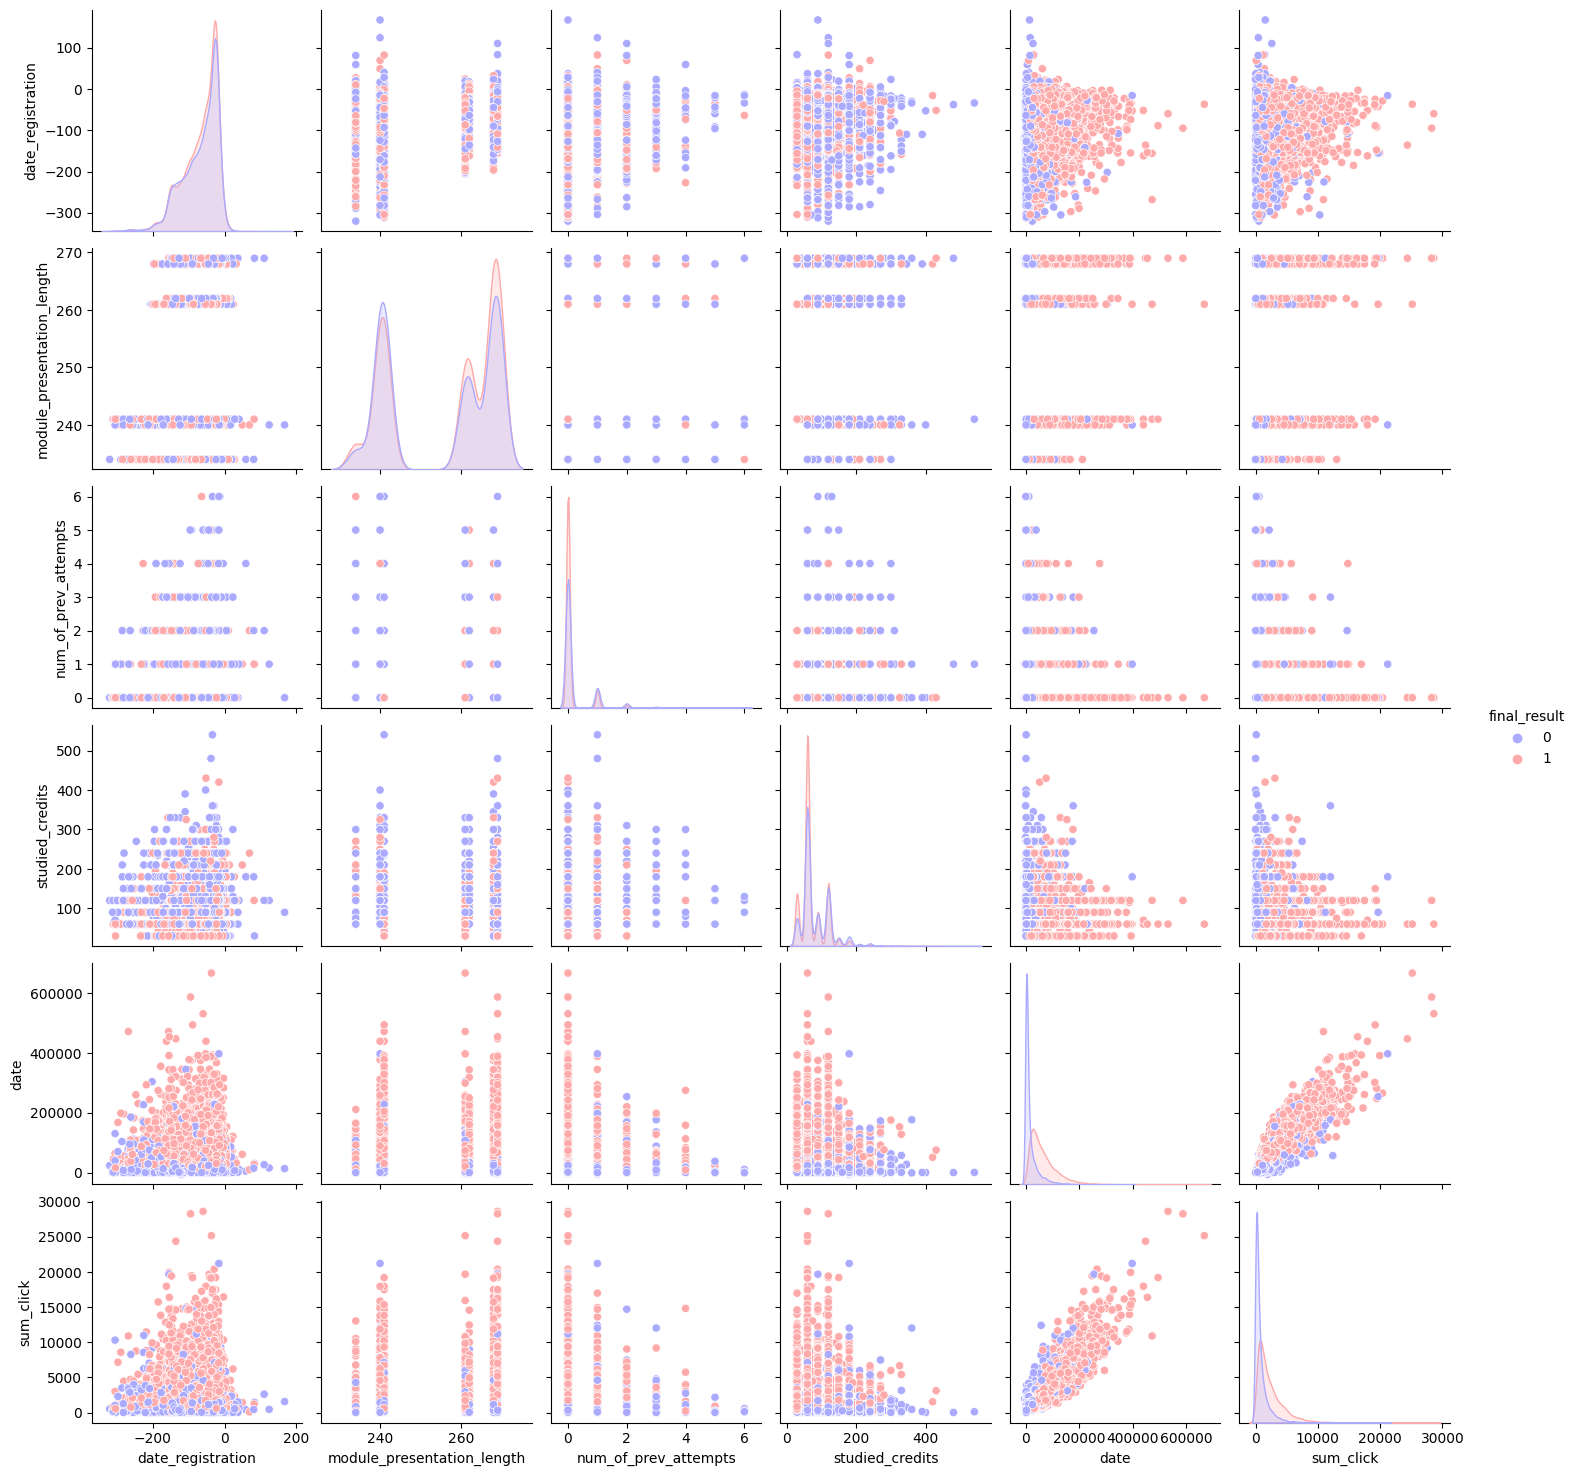

In [ ]:
fig = plt.figure(figsize=(15,15))
sns.pairplot(data = df,  
             hue ='final_result',  
             palette = 'bwr',)

<ipython-input-57-e03c05b0b793>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="YlGnBu", cbar=False);


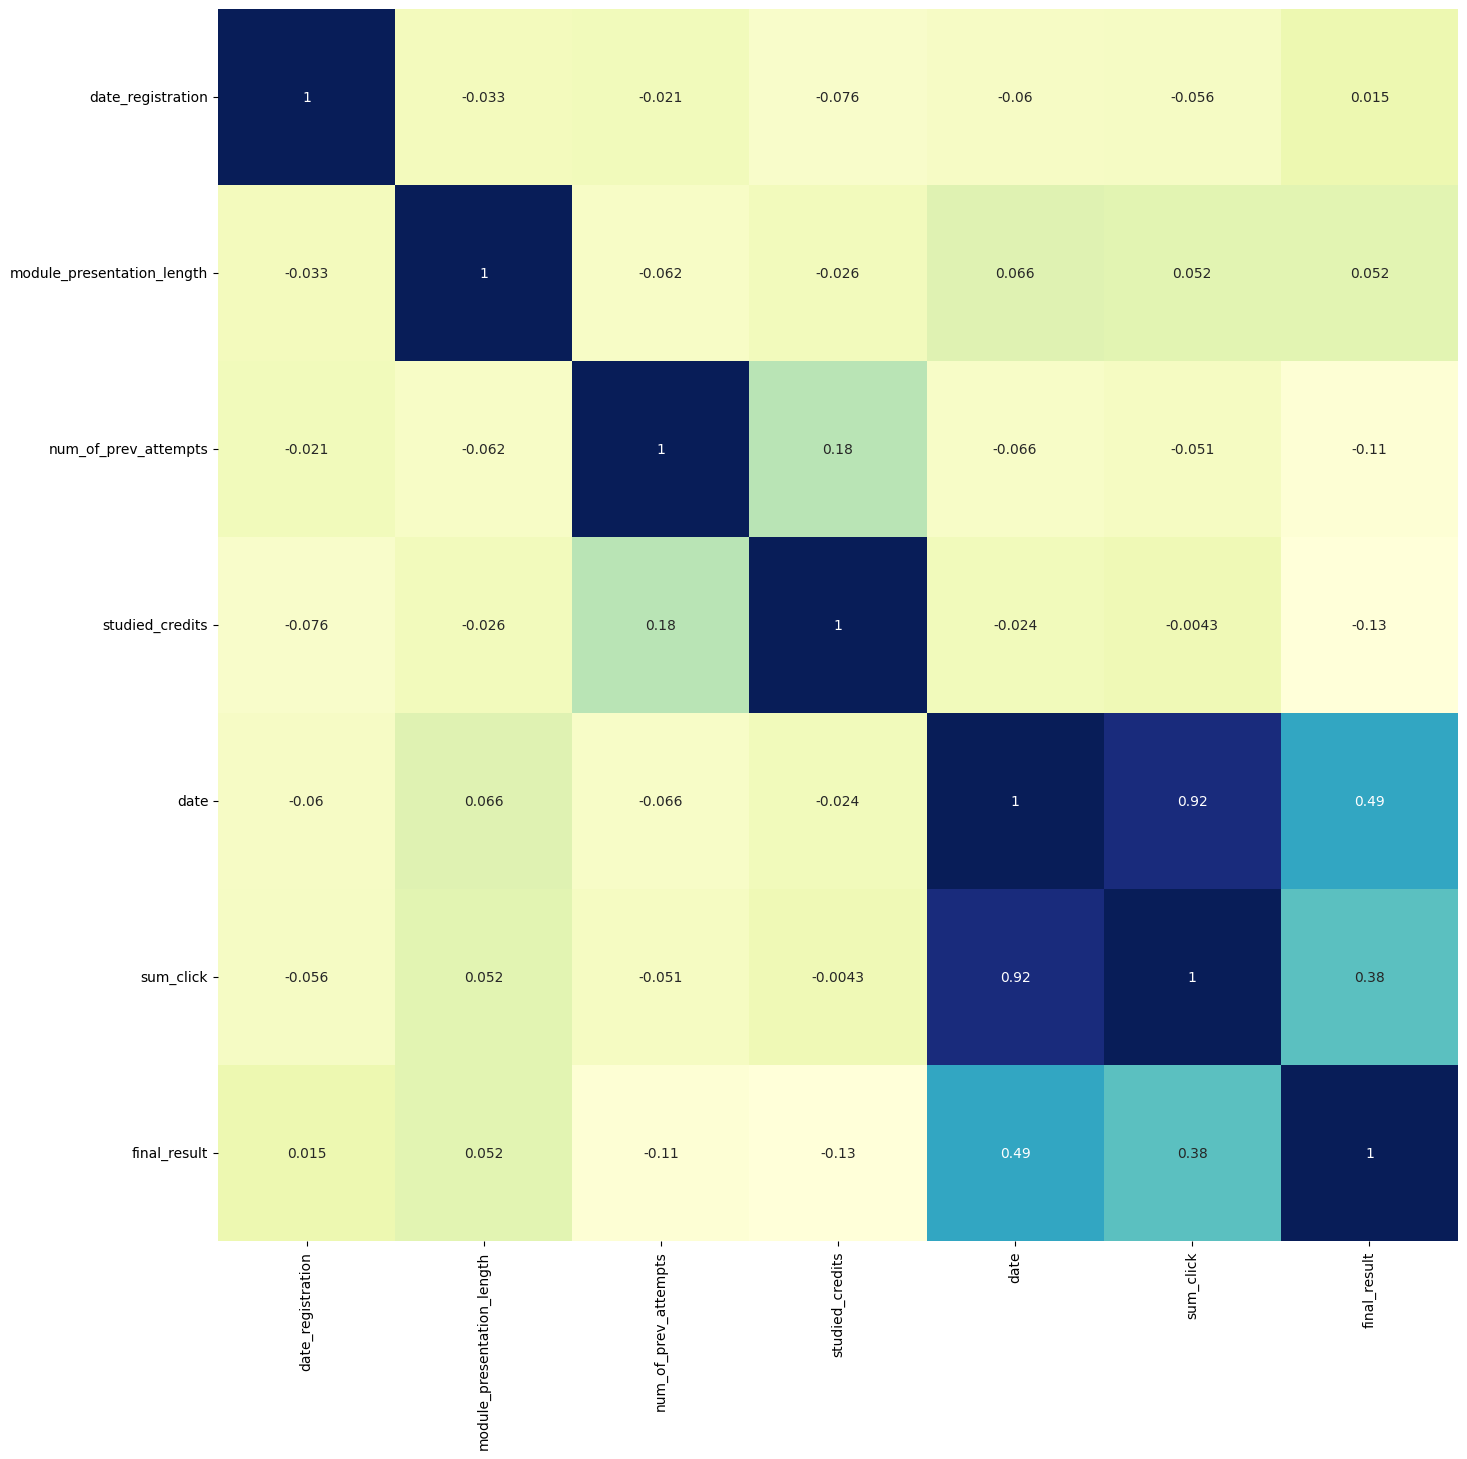

In [ ]:
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu", cbar=False);

## 1. code_module - идентификационный код модуля, на котором зарегистрирован студент

In [ ]:
df.groupby(['code_module', "final_result"])["final_result"].count()

code_module  final_result
AAA          0                180
             1                418
BBB          0               3318
             1               3009
CCC          0               2222
             1               1325
DDD          0               2905
             1               2113
EEE          0               1038
             1               1309
FFF          0               3300
             1               2910
GGG          0                798
             1               1229
Name: final_result, dtype: int64

<Axes: title={'center': 'Количество студентов получивших зачет в разрезе курсов'}, xlabel='code_module'>

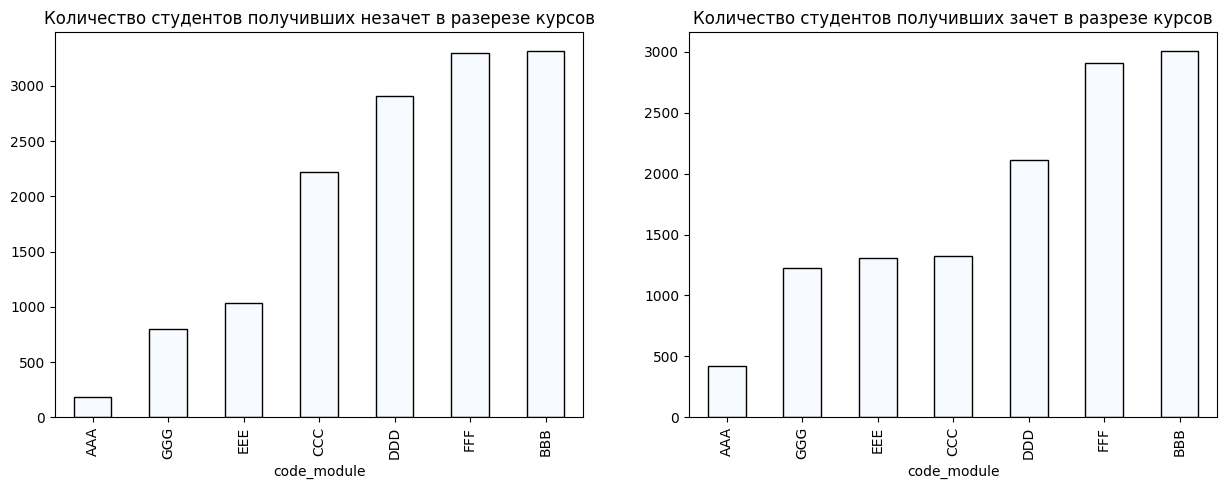

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (15,5))
plt.subplot(121)
out = df[df['final_result'] ==0 ]
cm = out.groupby('code_module')["final_result"].count().sort_values()
plt.title('Количество студентов получивших незачет в разерезе курсов')
cm.plot.bar(cmap="Blues", edgecolor='black')
plt.subplot(122)
out2 = df[df['final_result'] ==1 ]
cm2 = out2.groupby('code_module')["final_result"].count().sort_values()
plt.title('Количество студентов получивших зачет в разрезе курсов')
cm2.plot.bar(cmap="Blues", edgecolor='black')

<Figure size 1000x700 with 0 Axes>

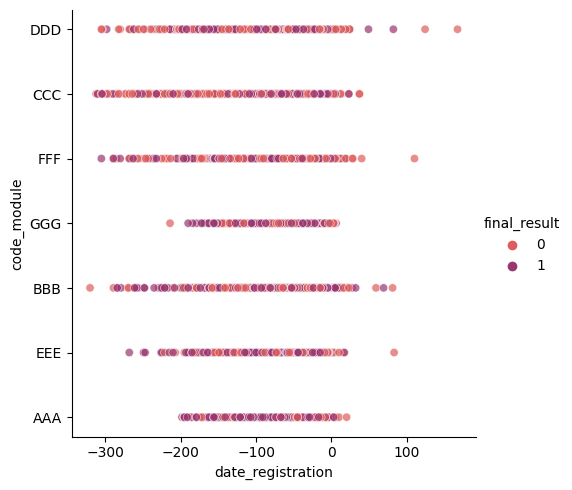

In [ ]:
plt.figure(figsize=(10,7))
sns.relplot(data=df, x = "date_registration", y = "code_module", alpha=0.7, hue="final_result" , palette="flare")

Любопытно, что на модули DDD, FFF и CCC студенты записывались раньше, чем на другие модули. На модулях DDD,FFF и BBB очень много тех, кто получил незачет. 

## 2. code_presentation - идентификационный код презентации, во время которой студент регистрируется на модуле

In [ ]:
df.groupby(['code_presentation', "final_result"])["final_result"].count()

code_presentation  final_result
2013B              0               2062
                   1               1670
2013J              0               3480
                   1               3594
2014B              0               3530
                   1               2696
2014J              0               4689
                   1               4353
Name: final_result, dtype: int64

<Axes: title={'center': 'Количество студентов получивших зачет в разрезе презентаций'}, xlabel='code_presentation'>

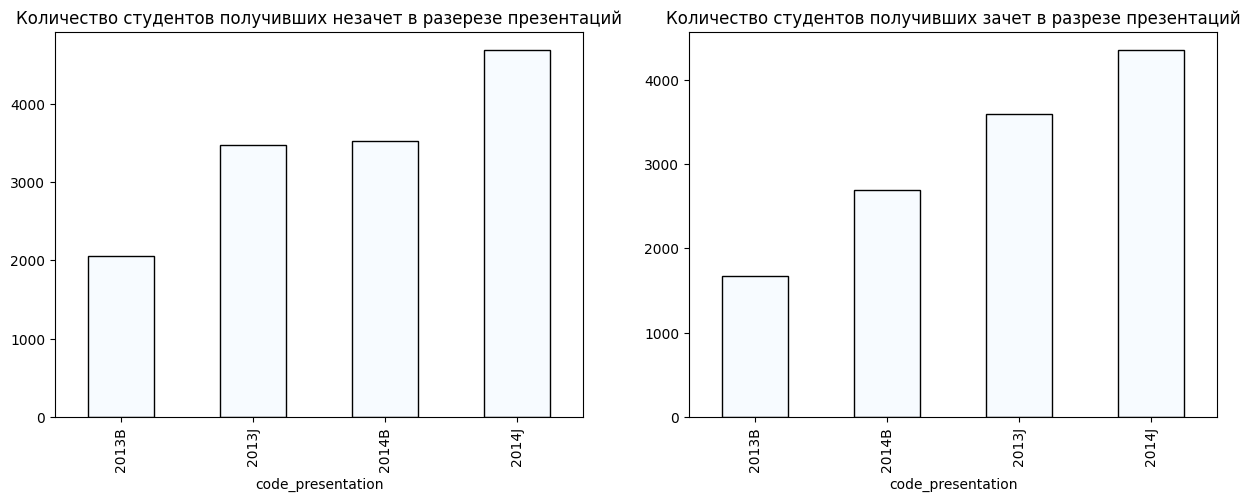

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (15,5))
plt.subplot(121)
out3 = df[df['final_result'] ==0 ]
cm3 = out3.groupby('code_presentation')["final_result"].count().sort_values()
plt.title('Количество студентов получивших незачет в разерезе презентаций')
cm3.plot.bar(cmap="Blues", edgecolor='black')
plt.subplot(122)
out4 = df[df['final_result'] ==1 ]
cm4 = out4.groupby('code_presentation')["final_result"].count().sort_values()
plt.title('Количество студентов получивших зачет в разрезе презентаций')
cm4.plot.bar(cmap="Blues", edgecolor='black')

Больше всего студентов получивших незачет  посетившие презентацию 2014J

А если создать новый признак код презентации+ код курса, как это повлияет на качество предсказания. Проверим.

In [ ]:
df['module_pres'] = df['code_module'] + df['code_presentation']

<Axes: title={'center': 'Зачет в разрезе презентаций и модулей'}, xlabel='module_pres'>

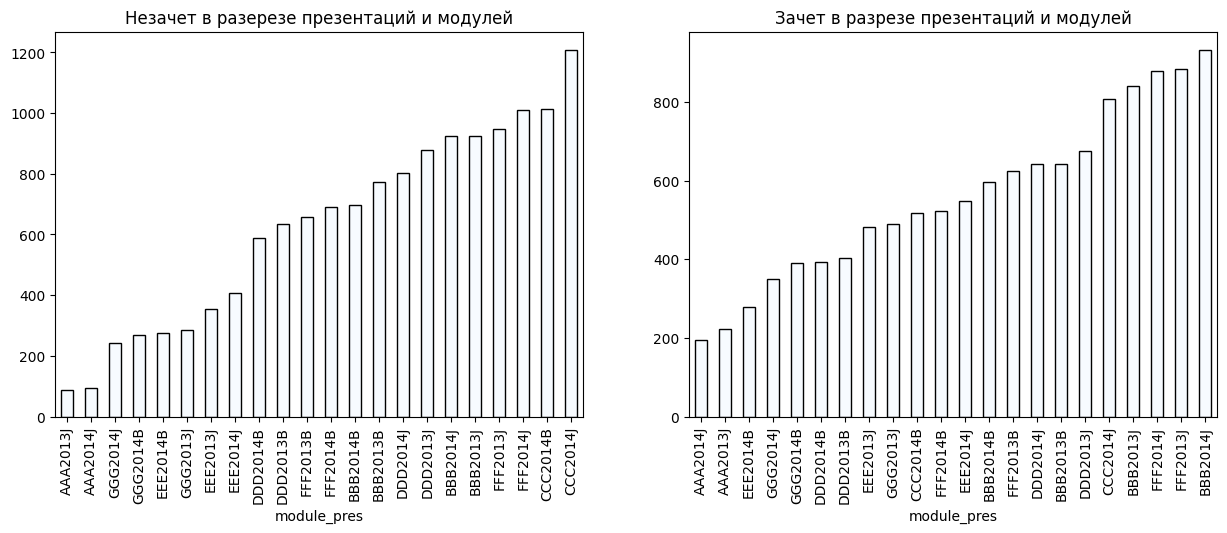

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (15,5))
plt.subplot(121)
out5 = df[df['final_result'] ==0 ]
cm5 = out5.groupby('module_pres')["final_result"].count().sort_values()
plt.title('Незачет в разерезе презентаций и модулей')
cm5.plot.bar(cmap="Blues", edgecolor='black')
plt.subplot(122)
out6 = df[df['final_result'] ==1 ]
cm6 = out6.groupby('module_pres')["final_result"].count().sort_values()
plt.title('Зачет в разрезе презентаций и модулей')
cm6.plot.bar(cmap="Blues", edgecolor='black')

Вот тут уже интереснее, мы видим, что больше всего незачета получили студенты курса ССС и поступившие на курс после перезентации 2014J. А больше зачетов получили студенты на курсе BBB после презентации 2014J

## 3. date_registration - дата регистрации студента на презентацию модуля, это количество дней, измеренное относительно начала презентации модуля (например, отрицательное значение -30 означает, что студент зарегистрировался на презентацию модуля за 30 дней до ее начала).

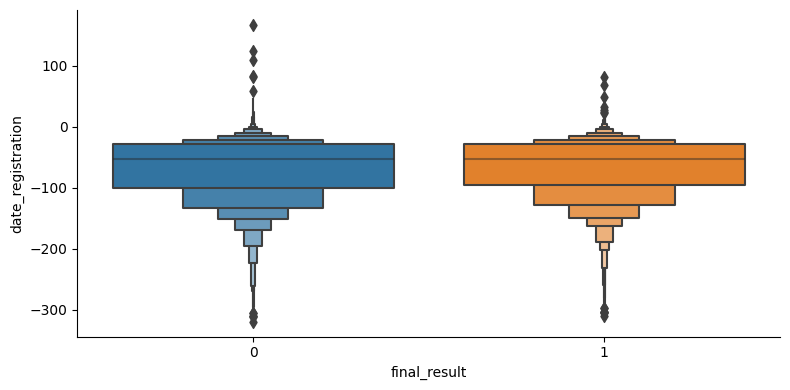

In [ ]:
sns.catplot(x="final_result", y="date_registration", data = df, height=4, aspect=2, kind='boxen')

Здесь нет каких, либо отличий в том, когда студен записался на курс. Т.е. от этого не зависило пулучит-ли студент зачет или нет

## 4. module_presentation_length - длина модуля-презентации в днях.

<Axes: title={'center': 'Зачет в зависимости от длины модуля-презентации'}, xlabel='module_presentation_length'>

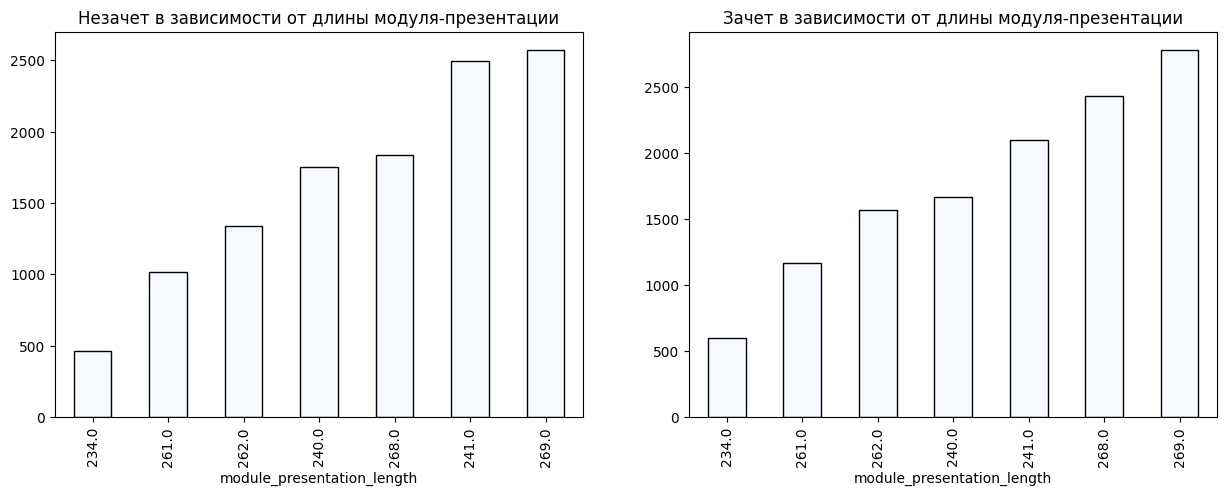

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (15,5))
plt.subplot(121)
out7 = df[df['final_result'] ==0 ]
cm7 = out7.groupby('module_presentation_length')["final_result"].count().sort_values()
plt.title('Незачет в зависимости от длины модуля-презентации')
cm7.plot.bar(cmap="Blues", edgecolor='black')
plt.subplot(122)
out8 = df[df['final_result'] ==1 ]
cm8 = out8.groupby('module_presentation_length')["final_result"].count().sort_values()
plt.title('Зачет в зависимости от длины модуля-презентации')
cm8.plot.bar(cmap="Blues", edgecolor='black')

Длина презентации так-же не влияет на то, будет-ли студент отчислен или нет.

## 5. gender – пол ученика

<Axes: title={'center': 'Зачет в зависимости от пола ученика'}, xlabel='gender'>

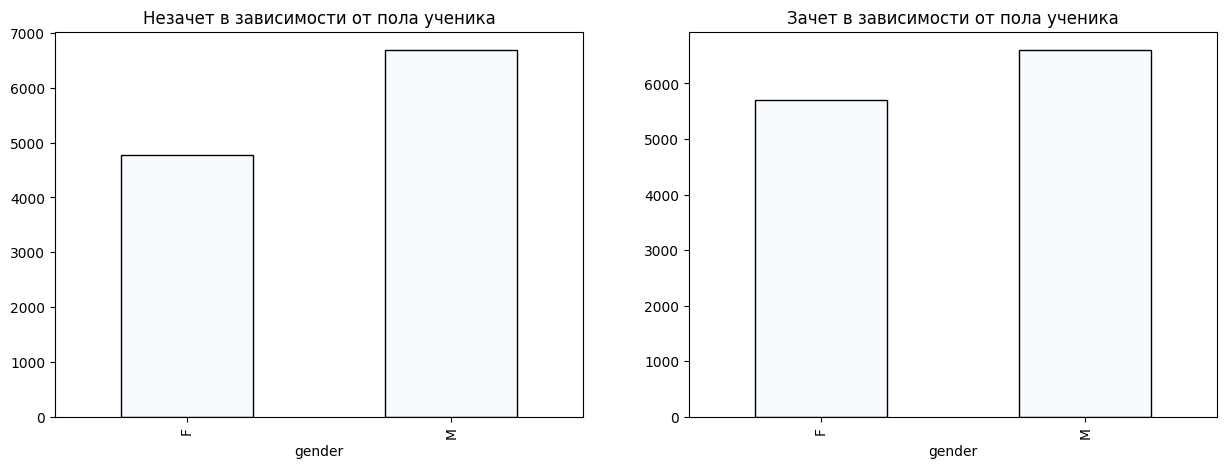

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (15,5))
plt.subplot(121)
out9 = df[df['final_result'] ==0 ]
cm9 = out9.groupby('gender')["final_result"].count().sort_values()
plt.title('Незачет в зависимости от пола ученика')
cm9.plot.bar(cmap="Blues", edgecolor='black')
plt.subplot(122)
out10 = df[df['final_result'] ==1 ]
cm10 = out10.groupby('gender')["final_result"].count().sort_values()
plt.title('Зачет в зависимости от пола ученика')
cm10.plot.bar(cmap="Blues", edgecolor='black')

И в этом случае какой-либо зависимости не наблюдается.

## 6. region - географический регион, в котором студент проживал во время прохождения модуля-презентации

<Axes: title={'center': 'Зачет в зависимости от региона'}, xlabel='region'>

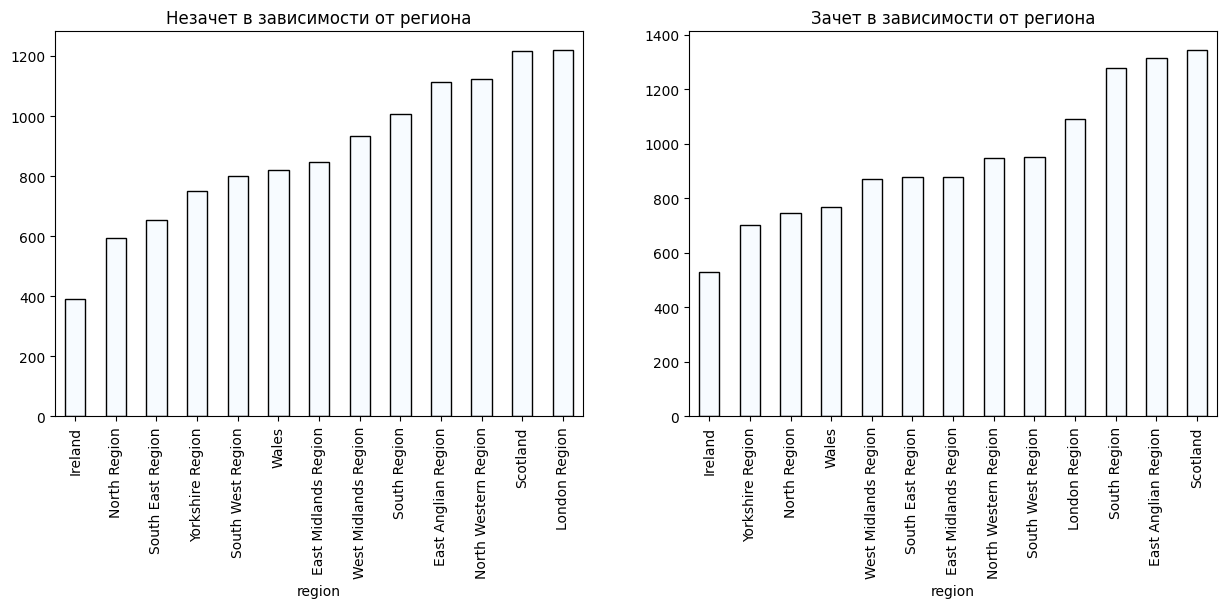

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (15,5))
plt.subplot(121)
out11 = df[df['final_result'] ==0 ]
cm11 = out11.groupby('region')["final_result"].count().sort_values()
plt.title('Незачет в зависимости от региона')
cm11.plot.bar(cmap="Blues", edgecolor='black')
plt.subplot(122)
out12 = df[df['final_result'] ==1 ]
cm12 = out12.groupby('region')["final_result"].count().sort_values()
plt.title('Зачет в зависимости от региона')
cm12.plot.bar(cmap="Blues", edgecolor='black')

Попробуем объединить регион и гендер. Посмотрим, что получиться.

In [ ]:
df['reg_gen'] = df['gender'] + df['region']

<Axes: title={'center': 'Незачет в зависимости от региона и пола'}, xlabel='reg_gen'>

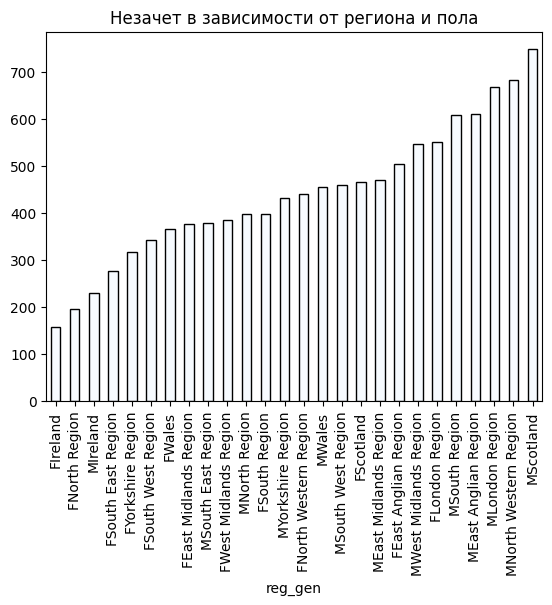

In [ ]:
out13 = df[df['final_result'] ==0 ]
cm13 = out13.groupby('reg_gen')["final_result"].count().sort_values()
plt.title('Незачет в зависимости от региона и пола')
cm13.plot.bar(cmap="Blues", edgecolor='black')

<Axes: title={'center': 'Зачет в зависимости от региона и гендера'}, xlabel='reg_gen'>

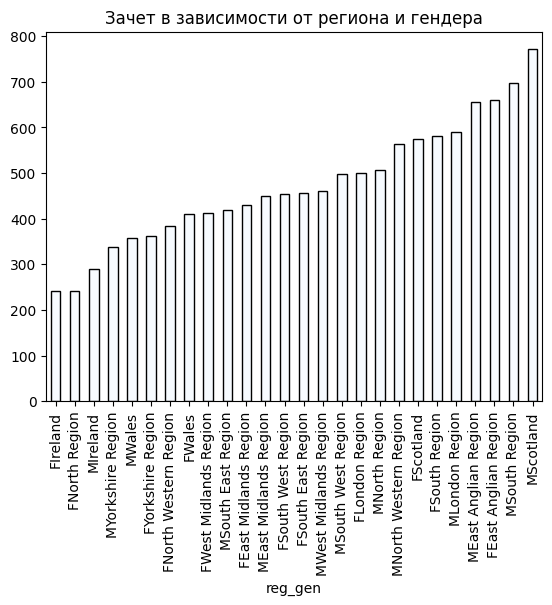

In [ ]:
out14 = df[df['final_result'] ==1 ]
cm14 = out14.groupby('reg_gen')["final_result"].count().sort_values()
plt.title('Зачет в зависимости от региона и гендера')
cm14.plot.bar(cmap="Blues", edgecolor='black')

Странно, но даже объединив пол и регион я не могла добиться каких-то интересных выводов о зависимости целевой метрики от нового признака. В любом случае - это новый столбец и мне кажется, что он более информативен, чем просто гендер и регион по отдельности.

## 7. highest_education - самый высокий уровень образования студента при поступлении на модульную презентацию.

<Axes: title={'center': 'Зачет в зависимости от уровня образования'}, xlabel='highest_education'>

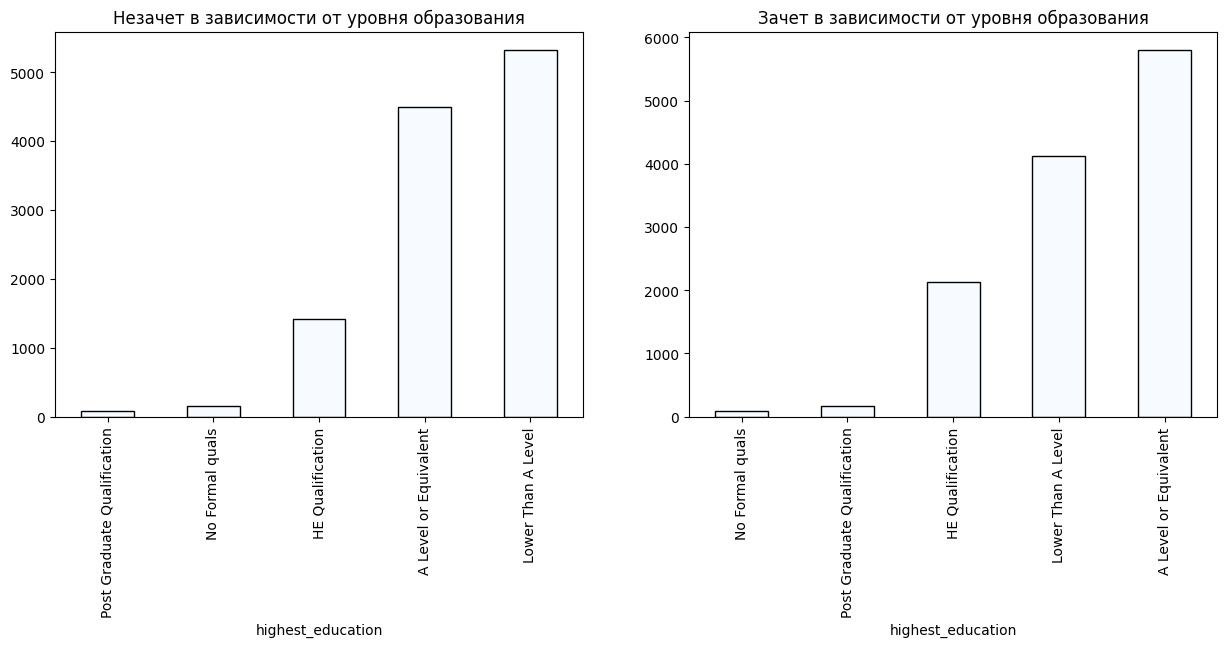

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (15,5))
plt.subplot(121)
out15 = df[df['final_result'] ==0 ]
cm15 = out15.groupby('highest_education')["final_result"].count().sort_values()
plt.title('Незачет в зависимости от уровня образования')
cm15.plot.bar(cmap="Blues", edgecolor='black')
plt.subplot(122)
out16 = df[df['final_result'] ==1 ]
cm16 = out16.groupby('highest_education')["final_result"].count().sort_values()
plt.title('Зачет в зависимости от уровня образования')
cm16.plot.bar(cmap="Blues", edgecolor='black')

Лучше всего учились студены с тем-же уровнем образования, что и курс, на котором они учились. Больше всех не сдали зачет студенты с уровнем образования ниже A.

##8. imd_band - насколько бедный район

<Axes: title={'center': 'Зачет в зависимости от уровня района проживания'}, xlabel='imd_band'>

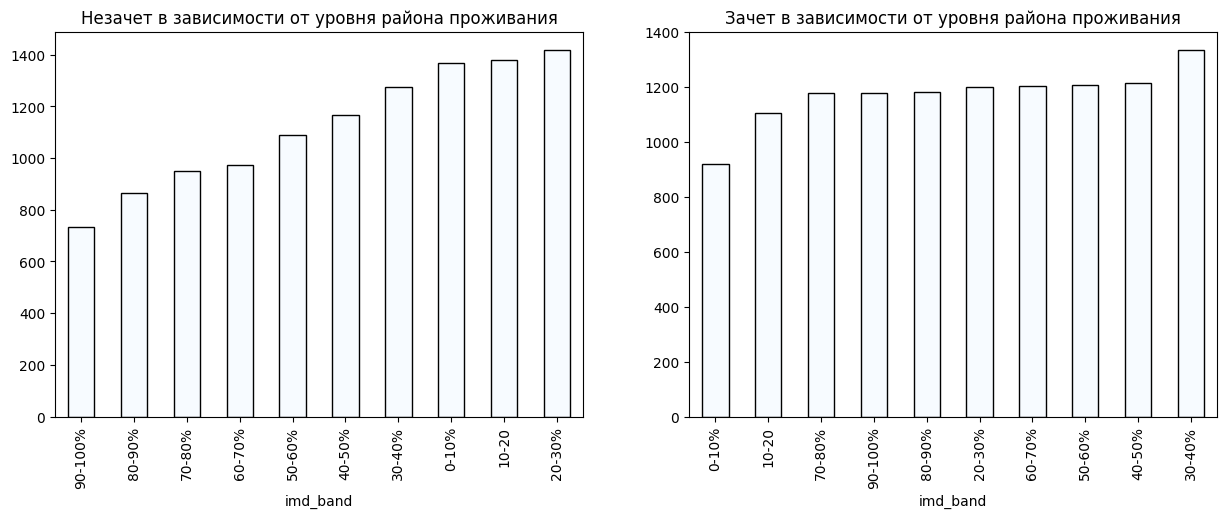

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (15,5))
plt.subplot(121)
out17 = df[df['final_result'] ==0 ]
cm17 = out17.groupby('imd_band')["final_result"].count().sort_values()
plt.title('Незачет в зависимости от уровня района проживания')
cm17.plot.bar(cmap="Blues", edgecolor='black')
plt.subplot(122)
out18 = df[df['final_result'] ==1 ]
cm18 = out18.groupby('imd_band')["final_result"].count().sort_values()
plt.title('Зачет в зависимости от уровня района проживания')
cm18.plot.bar(cmap="Blues", edgecolor='black')

Меньше всех получили неут студенты из богатых районов. Больше всех незачетов студентов из бедных районов от 0 до 30%. 

## 9.age_band - диапазон студенческого возраста

<Axes: title={'center': 'Зачет в зависимости от возраста'}, xlabel='age_band'>

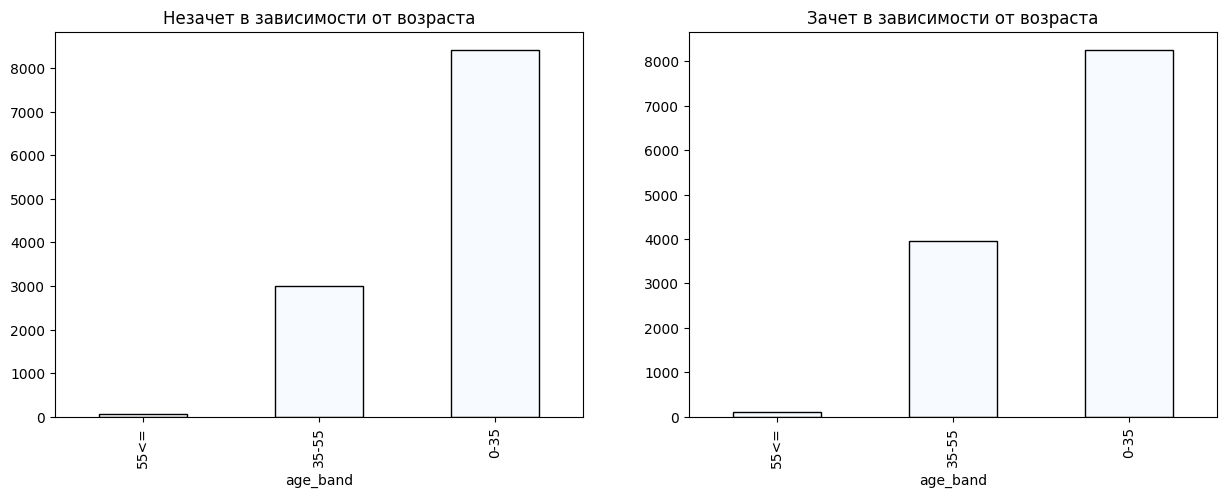

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (15,5))
plt.subplot(121)
out19 = df[df['final_result'] ==0 ]
cm19 = out19.groupby('age_band')["final_result"].count().sort_values()
plt.title('Незачет в зависимости от возраста')
cm19.plot.bar(cmap="Blues", edgecolor='black')
plt.subplot(122)
out20 = df[df['final_result'] ==1 ]
cm20 = out20.groupby('age_band')["final_result"].count().sort_values()
plt.title('Зачет в зависимости от возраста')
cm20.plot.bar(cmap="Blues", edgecolor='black')

Нет никакой зависимости. Студентов в возрасте от 0 др 35 болше, чем всех остальных

## 10. num_of_prev_attempts - – количество раз, когда учащийся пытался пройти этот модуль.

<Axes: title={'center': 'Зачет в зависимости от количества попыток пройти модуль'}, xlabel='num_of_prev_attempts'>

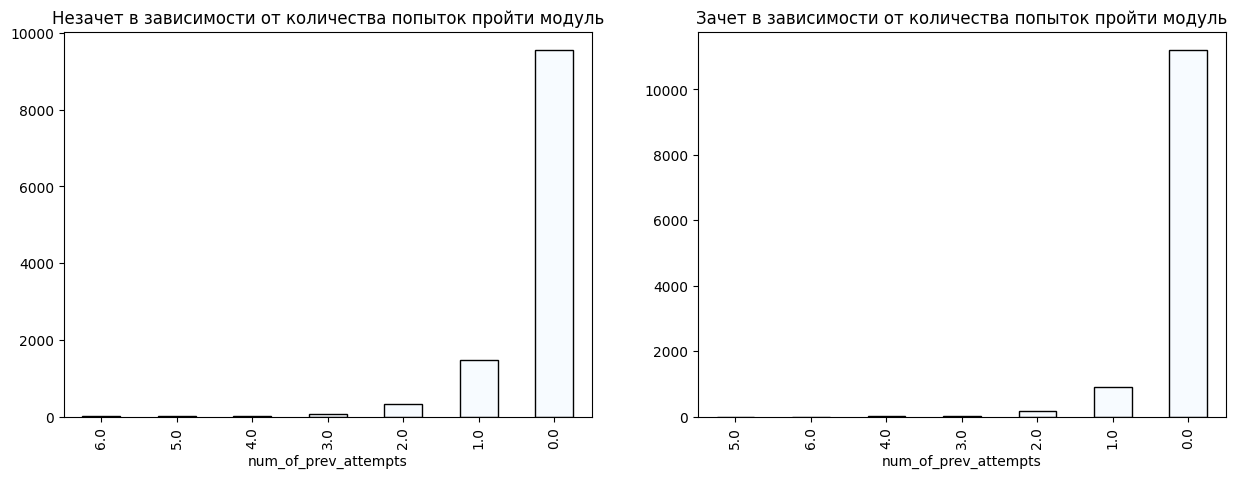

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (15,5))
plt.subplot(121)
out21= df[df['final_result'] ==0 ]
cm21 = out21.groupby('num_of_prev_attempts')["final_result"].count().sort_values()
plt.title('Незачет в зависимости от количества попыток пройти модуль')
cm21.plot.bar(cmap="Blues", edgecolor='black')
plt.subplot(122)
out22 = df[df['final_result'] ==1 ]
cm22 = out22.groupby('num_of_prev_attempts')["final_result"].count().sort_values()
plt.title('Зачет в зависимости от количества попыток пройти модуль')
cm22.plot.bar(cmap="Blues", edgecolor='black')

тут тоже нет какой-либо связи

## 11. studied_credits – общее количество кредитов по модулям, которые студент изучает в настоящее время.

<Axes: xlabel='studied_credits', ylabel='final_result'>

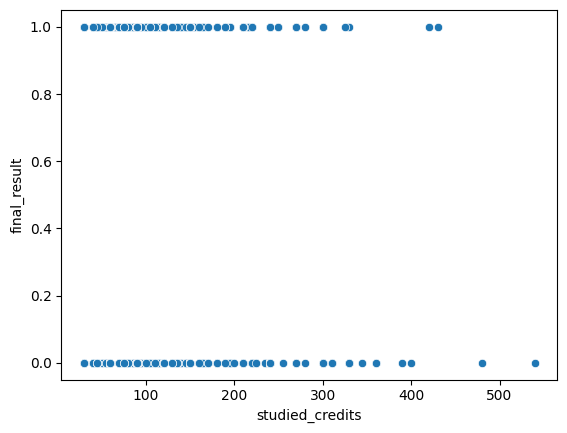

In [ ]:
sns.scatterplot(df, x = "studied_credits", y = "final_result")

Под данному признаку имеются выбросы

## 12. disability  – указывает, признан ли студент инвалидом.

<Axes: title={'center': 'Зачет в зависимости от инвалидности'}, xlabel='disability'>

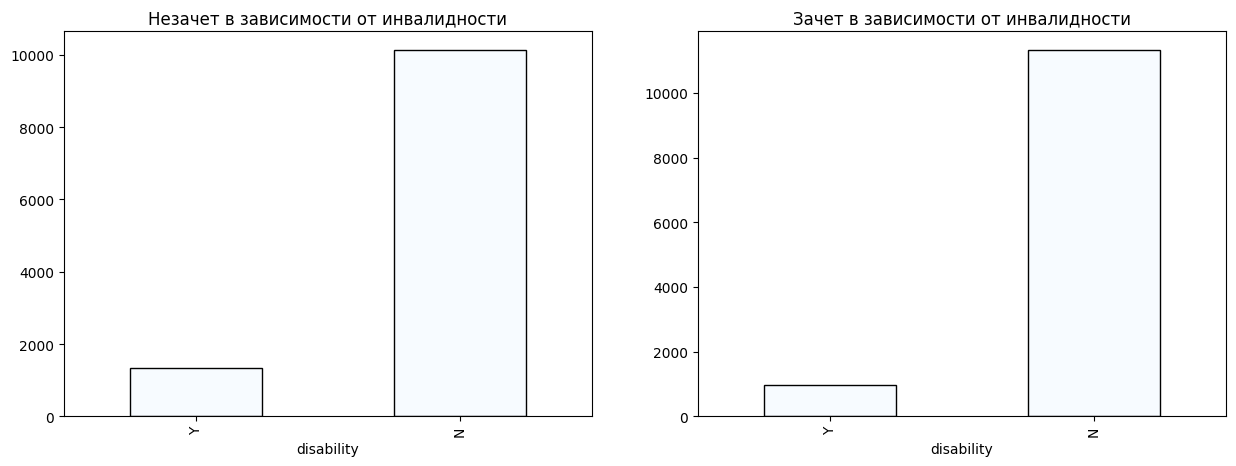

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (15,5))
plt.subplot(121)
out23= df[df['final_result'] ==0 ]
cm23 = out23.groupby('disability')["final_result"].count().sort_values()
plt.title('Незачет в зависимости от инвалидности')
cm23.plot.bar(cmap="Blues", edgecolor='black')
plt.subplot(122)
out24 = df[df['final_result'] ==1 ]
cm24 = out24.groupby('disability')["final_result"].count().sort_values()
plt.title('Зачет в зависимости от инвалидности')
cm24.plot.bar(cmap="Blues", edgecolor='black')

Нет связи

## 13. date - дата взаимодействия студента с материалом измеряется как количество дней с начала модуля-презентации

<Axes: xlabel='date', ylabel='final_result'>

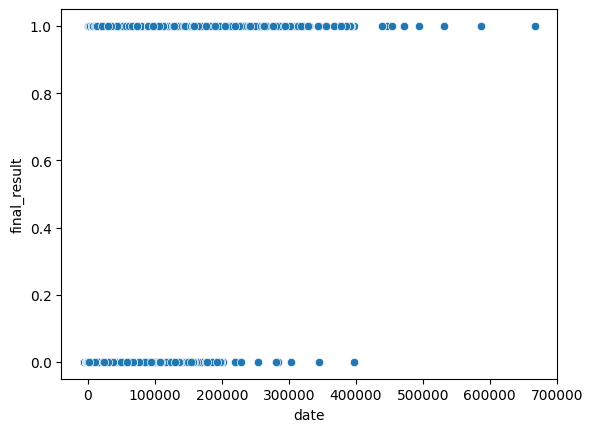

In [ ]:
sns.scatterplot(df, x = "date", y = "final_result")

Нет связи

## 14. sum_click - сколько раз учащийся взаимодействовал с материалом в этот день.

<Axes: xlabel='sum_click', ylabel='final_result'>

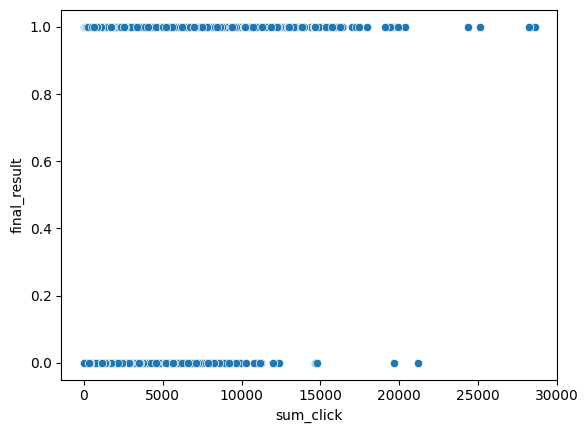

In [ ]:
sns.scatterplot(df, x = "sum_click", y = "final_result")

Можно сказать, что чем чаще студент заходил на платформу, тем выше шанс получить зачет.

# Обучение модели.

Для начала добавим новые признаки в обучающую и тестовую выборки

In [ ]:
Train['reg_gen'] = Train['gender'] + Train['region']

In [ ]:
Train['module_pres'] = Train['code_module'] + Train['code_presentation']

In [ ]:
Test['reg_gen'] = Test['gender'] + Test['region']

In [ ]:
Test['module_pres'] = Test['code_module'] + Test['code_presentation']

In [ ]:
Target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26074 entries, 0 to 26073
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   final_result  26074 non-null  int64
dtypes: int64(1)
memory usage: 407.4 KB


In [ ]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26074 entries, 0 to 26073
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   code_module                 26074 non-null  object 
 1   code_presentation           26074 non-null  object 
 2   date_registration           23774 non-null  float64
 3   module_presentation_length  23783 non-null  float64
 4   gender                      23783 non-null  object 
 5   region                      23783 non-null  object 
 6   highest_education           23783 non-null  object 
 7   imd_band                    22932 non-null  object 
 8   age_band                    23783 non-null  object 
 9   num_of_prev_attempts        23783 non-null  float64
 10  studied_credits             23783 non-null  float64
 11  disability                  23783 non-null  object 
 12  date                        23783 non-null  float64
 13  sum_click                   237

Создаем список категориальных и количественных признаков

In [ ]:
cat_columns = Train.select_dtypes(include = 'object').columns.tolist()

In [ ]:
num_columns = Train.select_dtypes(exclude= 'object').columns.tolist()

Создаем трансформер для категориальных данных

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (PowerTransformer, OneHotEncoder)
from sklearn.preprocessing import MinMaxScaler

In [ ]:
cat_pipe = Pipeline([('imp', SimpleImputer(strategy='most_frequent')),
                     ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))])

Трансформер для количественных переменных

In [ ]:
num_pipe = Pipeline([('imp', SimpleImputer()),
                     ('scaler', MinMaxScaler())])

Объединяем

In [ ]:
preprocessors = ColumnTransformer(transformers=[
    ('num', num_pipe, num_columns),
    ('cat', cat_pipe, cat_columns)
])

Попробуем обучить на самой простой логистической регрессии

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
ml_pipe = Pipeline([('tr', preprocessors),
                    ('logreg', LogisticRegression(solver='liblinear'))])

In [ ]:
ml_pipe.fit(Train,Target)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('tr',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imp',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['date_registration',
                                                   'module_presentation_length',
                                                   'num_of_prev_attempts',
                                                   'studied_credits', 'date',
                                                   'sum_click']),
                                                 ('cat',
                                                  Pipeline(steps=[('imp',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['code_module',
                                                   'code_presentation',
                                                   'gender', 'region',
                                                   'highest_education',
                                                   'imd_band', 'age_band',
                                                   'disability', 'reg_gen',
                                                   'module_pres'])])),
                ('logreg', LogisticRegression(solver='liblinear'))])

In [ ]:
predict = ml_pipe.predict(Test)

In [ ]:
Submission['final_result'] = predict

In [ ]:
Submission.to_csv('/content/L_Submission.csv',index=True)

In [ ]:
#                                ↓ соревнование         ↓ название файла     ↓ комментарий 
!kaggle competitions submit -c urfuaieng2022clf2 -f L_Submission.csv -m "test" 

100% 50.9k/50.9k [00:00<00:00, 238kB/s]
Successfully submitted to UrFU_AI_Eng_2022_Clf_2

Неожиданно - 0.82137. Это целых 4 балла

Попробуем на другом методе. Например KNeighborsClassifier

In [ ]:
from sklearn.neighbors import  KNeighborsClassifier 

In [ ]:
knn_piple = Pipeline ([('transform', preprocessors),
                   ('knn', KNeighborsClassifier(n_neighbors=9, 
                           weights='distance'))])

In [ ]:
knn_piple.fit(Train,Target)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imp',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['date_registration',
                                                   'module_presentation_length',
                                                   'num_of_prev_attempts',
                                                   'studied_credits', 'date',
                                                   'sum_click']),
                                                 ('cat',
                                                  Pipeline(steps=[('imp',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['code_module',
                                                   'code_presentation',
                                                   'gender', 'region',
                                                   'highest_education',
                                                   'imd_band', 'age_band',
                                                   'disability', 'reg_gen',
                                                   'module_pres'])])),
                ('knn',
                 KNeighborsClassifier(n_neighbors=9, weights='distance'))])

In [ ]:
predict_knn = knn_piple.predict(Test)

In [ ]:
Submission['final_result'] = predict_knn

In [ ]:
Submission.to_csv('/content/K_Submission.csv',index=True)

In [ ]:
#                                ↓ соревнование         ↓ название файла     ↓ комментарий 
!kaggle competitions submit -c urfuaieng2022clf2 -f K_Submission.csv -m "test" 

100% 50.9k/50.9k [00:00<00:00, 284kB/s]
Successfully submitted to UrFU_AI_Eng_2022_Clf_2

Стало хуже

Не буду больше эксперементировать. Лучший результат  - 0.82137. Ник - KozhedubNC